# Data Analytics Project about Used Cars
The DataSet is extracted from https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


## Cleaning the dataset 
Drop the columns that I think no contains relevant information for my analytic.
Additionaly, I check that all columns have values and not null values. I identify that ten row has null values in the 'engine_capacity' column but these correponding to a the electric cars


For now, all data set are clean. It is time for the axploratory analysis 



In [4]:
#droping columns that I think has not relevant information 
df.drop(['feature_0','feature_1','feature_2','feature_3',
        'feature_4','feature_5','feature_6','feature_7',
        'feature_8','feature_9',
        'location_region', 'number_of_photos', 'up_counter'], axis=1, inplace=True
        )

In [5]:
df.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,7


### Questions
<ol>
<li> Which is the data distribution of the quantitative variables?
<li>What is the behavior of the variable 'price_usd'?
How does this variable behave in relation to the qualitative variables? 
<li> Do electric vehicles have a higher price?  
<li> Do the variables 'price_usd' and 'odometer_value' have any correlation? The price of vehicles tends to fall the longer they are driven? 
<li>Does the color of the car affect its price?  
</ol>

I can understand the quantitative variables and other information using graphics...

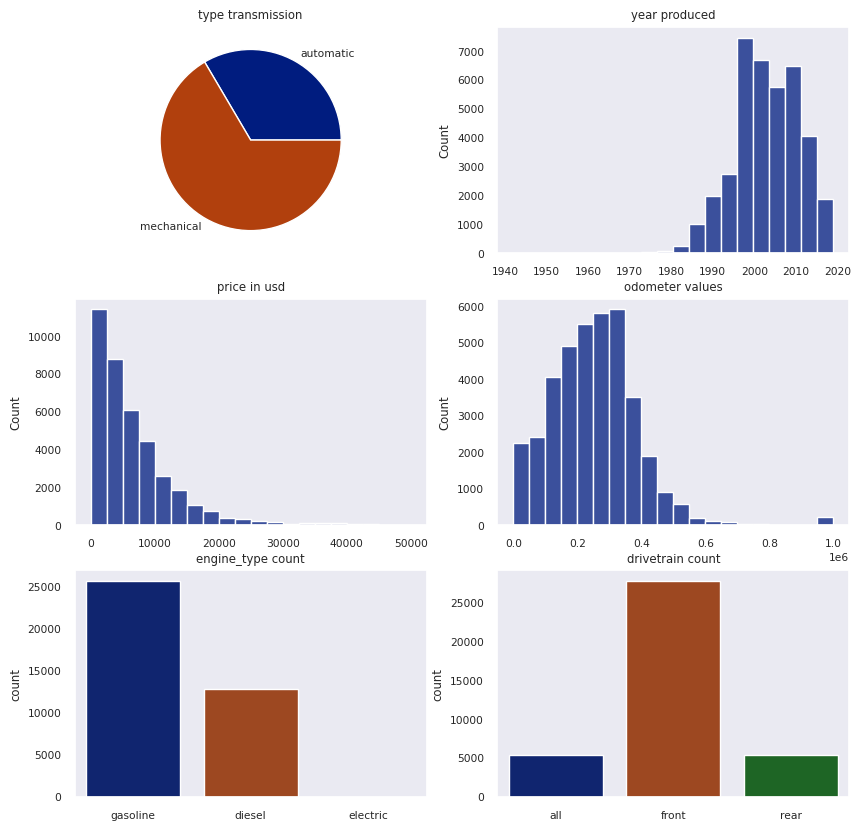

In [8]:
sns.set( #setting the graphics
    style='dark', 
    palette='dark', 
    font_scale= 0.7  
)
# creating the figure
fig, axes = plt.subplots(3,2, figsize= (10,10))

#transmision
tr = df.groupby('transmission')['transmission'].count() #groupby and count
axes[0,0].pie(tr, labels=['automatic', 'mechanical'])
axes[0,0].set_title('type transmission')

#count of vehicules by year_produced
sns.histplot(data=df, x='year_produced', ax=axes[0,1], bins= 20)
axes[0,1].set_title('year produced')
axes[0,1].set_xlabel('')

#distribution by price usd
sns.histplot(data=df, x='price_usd', ax=axes[1,0], bins=20)
axes[1,0].set_title('price in usd')
axes[1,0].set_xlabel('')

#distribution by odometer_value
sns.histplot(data=df, x='odometer_value', ax=axes[1,1], bins=20)
axes[1,1].set_title('odometer values')
axes[1,1].set_xlabel('')

#count of vehicules by engine_type 
sns.countplot(data=df, x='engine_type', ax=axes[2,0])
axes[2,0].set_title('engine_type count')
axes[2,0].set_xlabel('')

#count by drivetrain
sns.countplot(data=df, x='drivetrain', ax=axes[2,1])
axes[2,1].set_title('drivetrain count')
axes[2,1].set_xlabel('')

plt.show()

But, what is the behavior of the variable 'price_usd'?
How does this variable behave in relation to the qualitative variables? 

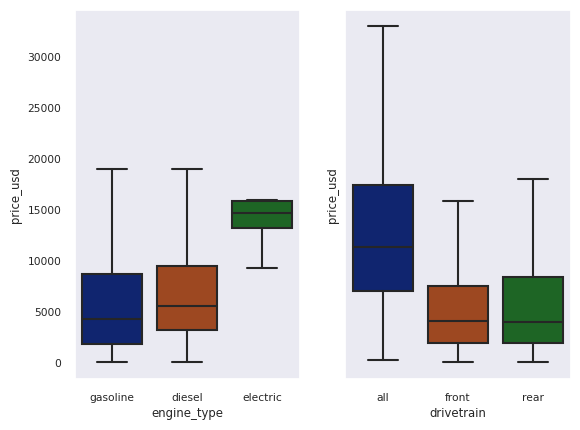

In [ ]:
fig, axes = plt.subplots(1,2, sharey=True)

#price by engine_type
sns.boxplot(data=df, 
                x='engine_type', 
                y='price_usd',
                showfliers=False,
                ax=axes[0]
                )

#price by drivetrain
sns.boxplot(data=df, 
                x='drivetrain', 
                y='price_usd',
                showfliers=False,
                ax=axes[1]
                )

plt.show()

Apparently the price of electric vehicles is above the price of those powered by fossil fuels. On the other hand, the price of all-wheel drive vehicles is higher than the price of front-wheel and rear-wheel drive vehicles, and their price range is even wider.

Is there any correlation between the variables 'price_usd', 'year_produced' and 'odometer_value'?

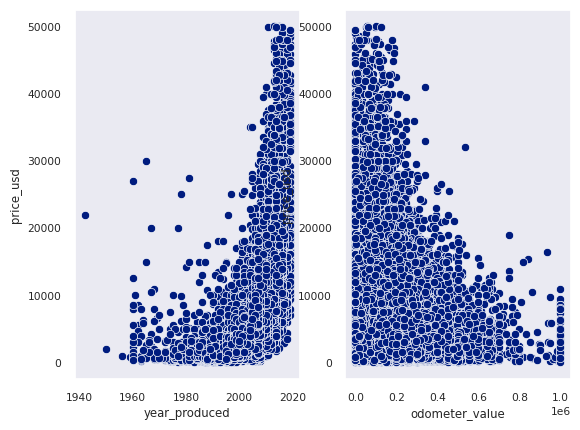

In [ ]:

fig, axes = plt.subplots(1,2)
#correlation year_produced - price_usd
sns.scatterplot(data=df, 
                y='price_usd',
                x='year_produced', 
                ax=axes[0]
                )

#correlation  odometer value - price_usd   
sns.scatterplot(data=df, 
                y='price_usd',
                x='odometer_value',
                ax=axes[1])             
plt.show()

We see that 'year_produced' and 'odometer_value' correlate with 'price_usd' in that the more kilometers the vehicle has, the lower the price range, and the newer the vehicle, the higher the price range.

But it is more interesting to see how it behaves with this correlation with the variables 'engine_type' and 'drive_train'. 

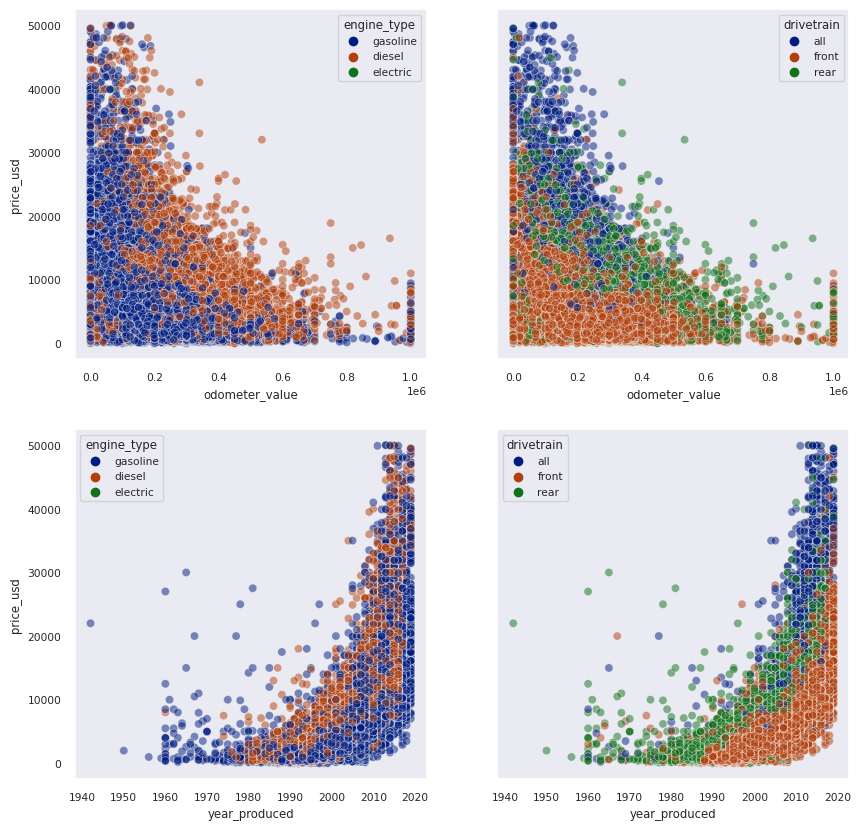

In [17]:
#correlation  odometer value - price_usd   
fig, axes = plt.subplots(2,2, sharey=True, figsize=(10,10))
sns.scatterplot(data=df, 
                y='price_usd',
                x='odometer_value',
                hue='engine_type', alpha=0.5,
                ax=axes[0,0]) 
sns.scatterplot(data=df, 
                y='price_usd',
                x='odometer_value',
                hue='drivetrain', alpha=0.5,
                ax=axes[0,1])     
sns.scatterplot(data=df, 
                y='price_usd',
                x='year_produced', 
                ax=axes[1,0],
                hue='engine_type', alpha=0.5
                )
sns.scatterplot(data=df, 
                y='price_usd',
                x='year_produced', 
                ax=axes[1,1],
                hue='drivetrain', alpha=0.5
                )                           
plt.show()

Wow, with this graph it is clearer and more interesting to see that apparently, the price of diesel-powered vehicles tend to maintain a higher price than gasoline-powered vehicles. As well as all-wheel drive vehicles.

Does the color of the vehicle in any way affect its price?

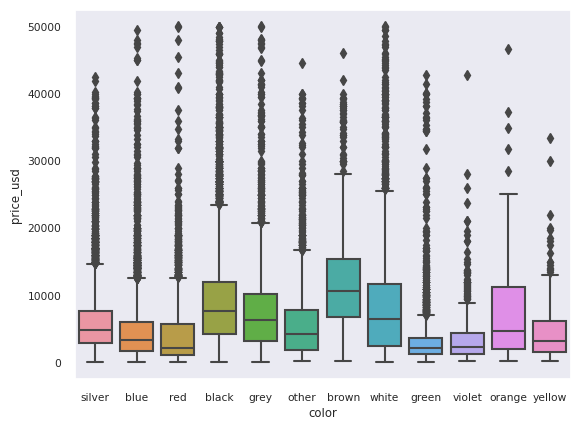

In [ ]:
sns.boxplot(data=df, x='color', y='price_usd', showfliers=True)
plt.show()

It is interesting to see that vehicles with black, brown, white and orange colors have a higher price range than the other colors, and even their IQR is above the rest. But, this is not really very conclusive.